In [29]:
import openpyxl
import json
import pandas as pd
from pycel import ExcelCompiler

def get_cell_value(file_name, cell_coordinates):
    # Создание компилятора Excel
    compiler = ExcelCompiler(filename=file_name)
    
    # Разделение координат на столбец и строку
    column_letter = cell_coordinates[0]
    row = int(cell_coordinates[1:])
    
    # Определение листа и значения ячейки
    sheet_name = "Таблицы"
    cell_value = compiler.evaluate(f'{sheet_name}!{column_letter}{row}')
    
    return cell_value


# JSON-объект
json_data = '''
{
    "Расходные коэфициенты" : {
        "Боксит": "N6",
        "Известняк": "N7",
        "Белый шлам": "N8",
        "Карбонатный шлам": "N9",
        "Кальцинированная сода": "N10",
        "Оборотный раствор": "N11"
    },
    "Воды на промывку" : {
        "Карбонатного шлама": "K54",
        "Отвального шлама": "N86",
        "Белого шлама": "L116",
        "Гидроксида алюминия": "K161"
    },
    "Содержание Al2O3 по переделам" : {
        "Спекание": "D22",
        "Выщелачивание": "D84",
        "Обескремнивание": "D98",
        "Карбонизация": "D143",
        "Гидроксид алюмния": "D151"
    }
}
'''

# Преобразование JSON в словарь
data = json.loads(json_data)

# Имя файла Excel
file_name = "Excels\Производство глинозема"

# Создание списка DataFrame'ов
dfs = []
# Обработка каждой категории в JSON-объекте
for category, inner_dict in data.items():
    df = pd.DataFrame()
    for i in ["1", "2"]:
        # Обработка каждого значения внутри текущей категории
        for value_name, cell_coordinates in inner_dict.items():
            # Получение значения из ячейки
            cell_value = get_cell_value(file_name + i + ".xlsx", cell_coordinates)
            
            # Добавление значения в DataFrame
            df.loc[category + i ,value_name] = cell_value
        
        # Добавление DataFrame в список
    dfs.append(df)



In [38]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.backends.backend_qt4agg import FigureCanvasQTAgg as FigureCanvas

C:\Users\User\AppData\Local\Temp\ipykernel_32852\2694057731.py:3: MatplotlibDeprecationWarning: 
The matplotlib.backends.backend_qt4agg backend was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  from matplotlib.backends.backend_qt4agg import FigureCanvasQTAgg as FigureCanvas


In [3]:
import json
with open("../JSON/graph.json", "r") as file:
    data = json.load(file)

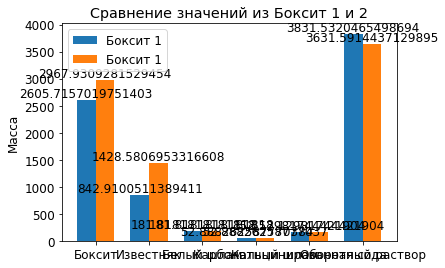

In [49]:


get_canva1(dfs[0])

In [40]:
df.columns

['Воды на промывку1', 'Воды на промывку2']

In [42]:
list(dfs[1].columns)

['Карбонатного шлама',
 'Отвального шлама',
 'Белого шлама',
 'Гидроксида алюминия']

In [ ]:
!pyuic5 -x BauxOutput2.ui -o BauxOutput2.py

In [1]:
import sys
from PyQt5.QtWidgets import QApplication, QMainWindow, QDialog, QVBoxLayout, QLabel, QPushButton
from PyQt5.QtCore import QTimer, Qt

class LoadingDialog(QDialog):
    def __init__(self, parent=None):
        super().__init__(parent)

        self.setWindowTitle("Загрузка")
        self.setWindowModality(Qt.ApplicationModal)
        self.setFixedSize(200, 100)

        layout = QVBoxLayout()

        self.label = QLabel("Проводятся расчеты", self)
        layout.addWidget(self.label, alignment=Qt.AlignHCenter)

        self.setLayout(layout)

        self.timer = QTimer(self)
        self.timer.timeout.connect(self.update_dots)
        self.timer.start(300)

        self.dot_count = 0

    def update_dots(self):
        self.dot_count = (self.dot_count + 1) % 4
        self.label.setText(f"Проводятся расчеты{'.' * self.dot_count}")

class MainWindow(QMainWindow):
    def __init__(self):
        super().__init__()

        self.initUI()

    def initUI(self):
        self.setGeometry(300, 300, 400, 300)
        self.setWindowTitle('Пример окна загрузки')

        self.btn = QPushButton('Начать расчет', self)
        self.btn.clicked.connect(self.show_loading_dialog)
        self.btn.resize(self.btn.sizeHint())
        self.btn.move(150, 130)

    def show_loading_dialog(self):
        loading_dialog = LoadingDialog(self)
        loading_dialog.show()

        # Здесь выполняются ваша задача или вычисления
        self.perform_calculations()

        loading_dialog.close()

    def perform_calculations(self):
        for _ in range(50):
            time.sleep(0.1)  # Замените этот блок на свои вычисления или задачу

if __name__ == '__main__':
    app = QApplication(sys.argv)
    main_window = MainWindow()
    main_window.show()
    sys.exit(app.exec_())


NameError: name 'time' is not defined

SystemExit: 0

c:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3405: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
